In [45]:
import ROOT
import array
from ROOT import TFile, Main, DataTypes, Base
import sys, os, math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
# %matplotlib notebook
%matplotlib inline

In [2]:
import itertools

def xy_powers(order):
    powers = itertools.product(range(order + 1), range(order + 1))
    return [tup for tup in powers if sum(tup) <= order]

def polyfit2d(x, y, z, order=3):
    ncols = (order + 1)**2
    G = np.zeros((x.size, ncols))
    ij = itertools.product(range(order+1), range(order+1))
#     ij = xy_powers(order)
    for k, (i,j) in enumerate(ij):
        G[:,k] = x**i * y**j
    m, _, _, _ = np.linalg.lstsq(G, z)
    return m

def polyval2d(x, y, m):
    order = int(np.sqrt(len(m))) - 1
    ij = itertools.product(range(order+1), range(order+1))
    z = np.zeros_like(x)
    for a, (i,j) in zip(m, ij):
        z += a * x**i * y**j
    return z

In [3]:
f_cv = ROOT.TFile("xsec_file_CV.root")
f_DLdown = ROOT.TFile("xsec_file_DLdown.root")

In [4]:
xsec_cv_muangle_mumom_h = f_cv.Get("xsec_poly_muangle_mumom_CV")
xsec_DLdown_muangle_mumom_h = f_DLdown.Get("xsec_poly_muangle_mumom_DLdown")

In [5]:
x = np.zeros(42)
y = np.zeros(42)
z = np.zeros(42)

for i in xrange(0, xsec_cv_muangle_mumom_h.GetNumberOfBins()):
#     print xsec_cv_muangle_mumom_h.GetBinWidth(i)
    w_x = (xsec_cv_muangle_mumom_h.GetBins()[i].GetXMax() - xsec_cv_muangle_mumom_h.GetBins()[i].GetXMin())/2
    w_y = (xsec_cv_muangle_mumom_h.GetBins()[i].GetYMax() - xsec_cv_muangle_mumom_h.GetBins()[i].GetYMin())/2
    x[i] = xsec_cv_muangle_mumom_h.GetBins()[i].GetXMin() + w_x
    y[i] = xsec_cv_muangle_mumom_h.GetBins()[i].GetYMin() + w_y
    z[i] = xsec_DLdown_muangle_mumom_h.GetBins()[i].GetContent() / xsec_cv_muangle_mumom_h.GetBins()[i].GetContent()

In [6]:
print z.min(), z.max()

0.397300619559 1.24579922274


In [7]:
m = polyfit2d(x,y,z, order=3)

In [8]:
nx, ny = 20, 20
xx, yy = np.meshgrid(np.linspace(x.min(), x.max(), nx), 
                         np.linspace(y.min(), y.max(), ny))
zz = polyval2d(xx, yy, m)

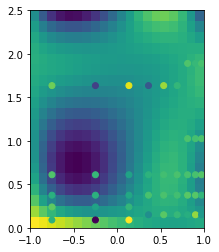

In [9]:
# Plot
# plt.imshow(zz, extent=(x.min(), y.max(), x.max(), y.min()))
plt.imshow(zz, extent=(-1, 1, 0, 2.5))
plt.scatter(x, y, c=z)

# fig = plt.figure(figsize=(18,12),facecolor='w')
# ax = fig.gca(projection='3d')
# ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, alpha=0.2)
# ax.scatter(x, y, z, c='r', s=50)

plt.show()

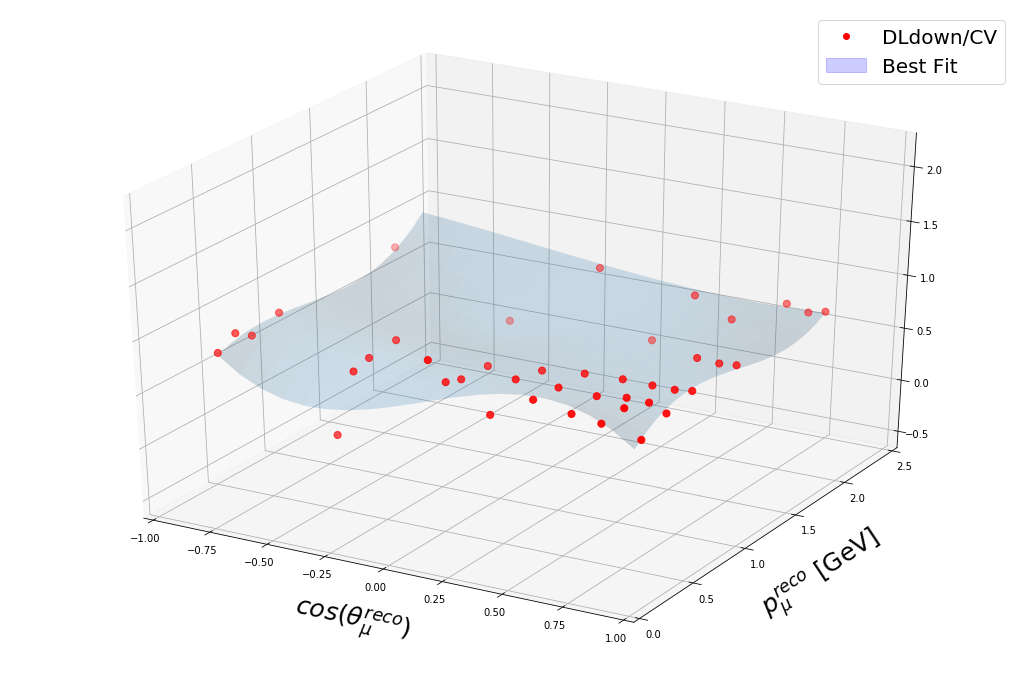

In [83]:
fig = plt.figure(figsize=(18,12),facecolor='w')
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, alpha=0.2)
ax.scatter(x, y, z, c='r', s=50, label='DLdown')

ax.set_xlim3d(-1, 1)
ax.set_ylim3d(0,2.5)
ax.set_zlim3d(z.min()-1, z.max()+1)

plt.xlabel(r'$cos(\theta_{\mu}^{reco})$', fontsize=25,fontweight='bold', labelpad=25)
plt.ylabel(r'$p_\mu^{reco}$ [GeV]', fontsize=25, labelpad=25)
# ax.set_zlabel(r'${d^2\sigma}/{(dp_\mu^{reco}\cdot d\cos{\theta_{\mu}^{reco}})}$[$\frac{10^{-38} cm^2}{GeV \cdot n}$]', fontsize=25, labelpad=25)
# ax.set_zlabel(r'DLdown / CV', fontsize=25, labelpad=25)


proxy0 = plt.axvline(x = 1, color='r', marker = 'o', linestyle='none')
# proxy2 = plt.Rectangle((0, 0), 1, 1, fc='salmon')
proxy1 = mpatches.Patch(color='b', alpha=0.2)
ax.legend([proxy0, proxy1],['DLdown/CV', 'Best Fit'], fontsize=20,loc=1)
                       
# leg=plt.legend(fontsize=20,loc=1)

               
plt.show()
# plt.savefig('DLdown_CV_ratio_fit.pdf')

# Chi-Squared Variations

In [61]:
df = pd.DataFrame(columns=['name', 'chi2', 'chi2_t3'], data=[['test', 0.,0.]])

In [62]:
df.at[0, 'name'] = 'Default';                           df.at[0, 'chi2'] = 245;  df.at[0, 'chi2_t3'] = 209
df.at[1, 'name'] = 'w/o Correlations';                  df.at[1, 'chi2'] = 106;  df.at[1, 'chi2_t3'] = 65
df.at[2, 'name'] = 'w/o Flux Matrix';                   df.at[2, 'chi2'] = 280;  df.at[2, 'chi2_t3'] = 225
df.at[3, 'name'] = 'w/o Dirt Matrix';                   df.at[3, 'chi2'] = 269;  df.at[3, 'chi2_t3'] = 213
df.at[4, 'name'] = 'w/o Detector Matrix';               df.at[4, 'chi2'] = 422;  df.at[4, 'chi2_t3'] = 299
df.at[5, 'name'] = 'w/o Detector Correlations';         df.at[5, 'chi2'] = 99;   df.at[5, 'chi2_t3'] = 71
df.at[6, 'name'] = 'w/o Last Bin';                      df.at[6, 'chi2'] = 240;  df.at[6, 'chi2_t3'] = 165
df.at[7, 'name'] = 'w/o Last Bin and w/o Det. Corr.';   df.at[7, 'chi2'] = 77;   df.at[7, 'chi2_t3'] = 53
df.at[8, 'name'] = 'w/o Last 2 High Mom. Bins';         df.at[8, 'chi2'] = 173;  df.at[8, 'chi2_t3'] = 89

df

,name,chi2,chi2_t3
0,Default,245.0,209.0
1,w/o Correlations,106.0,65.0
2,w/o Flux Matrix,280.0,225.0
3,w/o Dirt Matrix,269.0,213.0
4,w/o Detector Matrix,422.0,299.0
5,w/o Detector Correlations,99.0,71.0
6,w/o Last Bin,240.0,165.0
7,w/o Last Bin and w/o Det. Corr.,77.0,53.0
8,w/o Last 2 High Mom. Bins,173.0,89.0


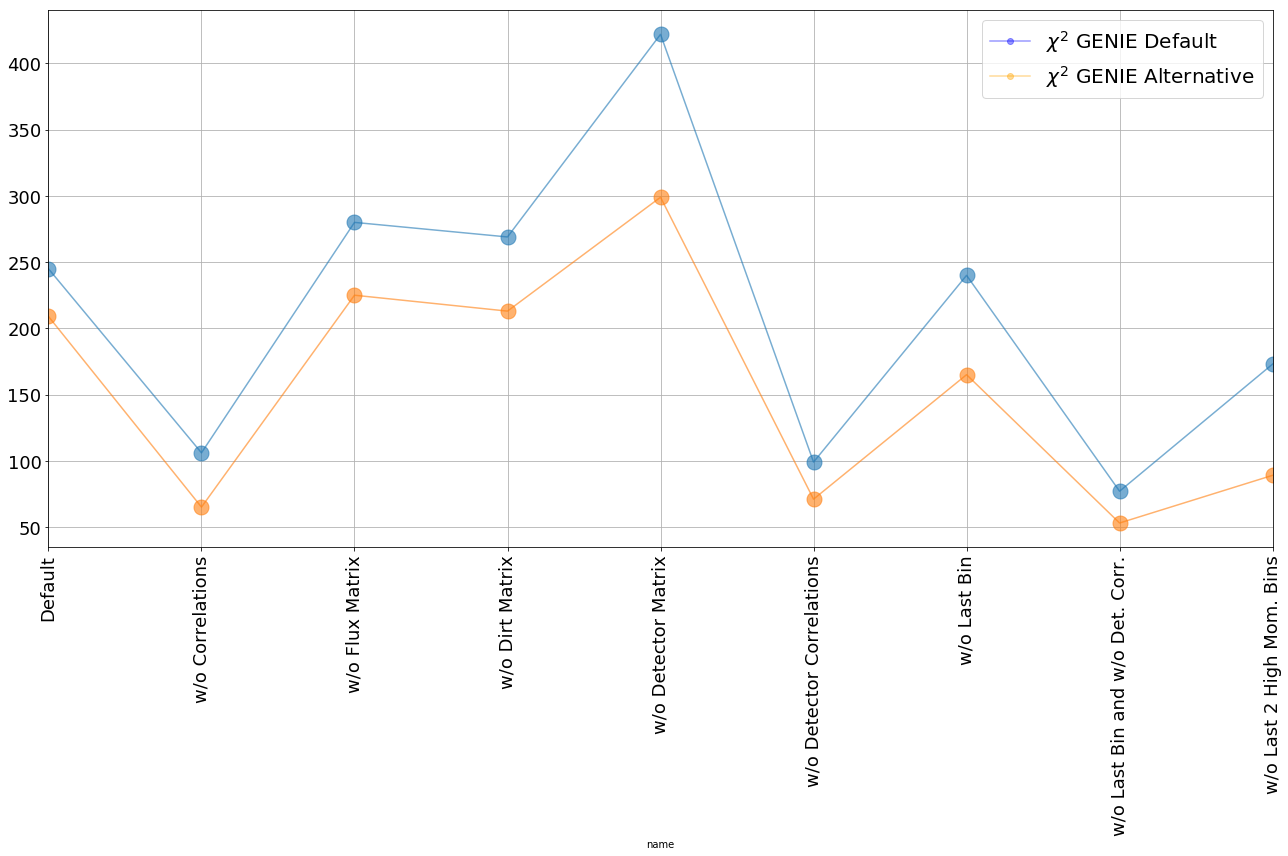

In [92]:
fig = plt.figure(figsize=(18,12),facecolor='w')

df.plot(x = 'name', y=['chi2', 'chi2_t3'], figsize=[18, 12], rot=90, grid=True, fontsize=18, marker='o', markersize=15, alpha=0.6)
# leg=plt.legend(fontsize=20,loc=1)

proxy0 = plt.axvline(x = -1, color='b', linestyle='-', marker = 'o', alpha=0.4)
proxy1 = plt.axvline(x = -1, color='orange', linestyle='-', marker = 'o', alpha=0.4)
plt.legend([proxy0, proxy1],['$\chi^2$ GENIE Default', '$\chi^2$ GENIE Alternative'], fontsize=20,loc=1)
plt.tight_layout()
plt.savefig('chi2_variations.pdf')